In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from iminuit import Minuit

import emcee
from pprint import pprint
import time
from multiprocessing import Pool

import random

## 2007(2) 模型检验

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_072(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata072 = pd.read_csv("perlist072_s.csv")
    f = perdata072['f']
    per = perdata072['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata072)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [3]:
m072=Minuit(twi_minus_loglikelihood_072,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,

         errordef=1)

'''
特殊：不对参数进行限制但不会标红
log_f_b 给出很夸张的值，不太可靠
'''

m072.migrad()

pprint(m072.fval)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]


FCN = 5605.245147071613 
 TOTAL NCALL = 282 
 NCALLS = 282 
 
 
 EDM = 7.932783193325583e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-3.19195,0.0994786,,,,,No
1,log_f_b,16.6808,1.26438,,,,,No
2,alpha_H,10.8753,0.730001,,,,,No
3,log_poisson,0.540675,0.0145423,,,,,No


5605.245147071613


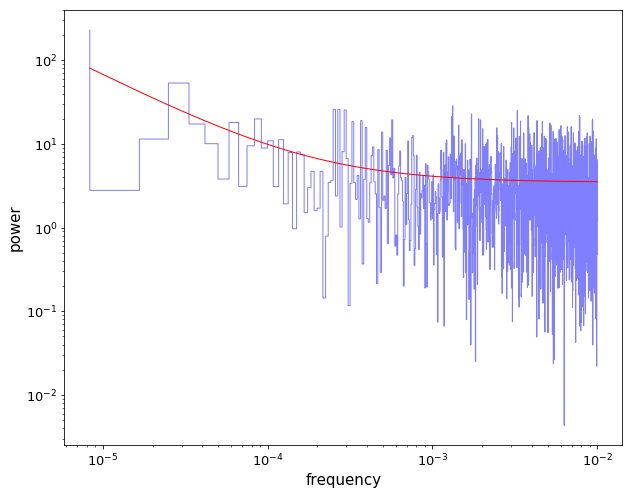

In [4]:
perdata072 = pd.read_csv("perlist072_s.csv")
f_072 = perdata072['f']
per_072 = perdata072['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m072.values[0],m072.values[1],m072.values[2],m072.values[3]

model_072 = []
f_length_072 = len(f_072)
for i in range(f_length_072):
    model_072.append(((f_072[i]**(-alpha_L))/(1+(f_072[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_072, per_072, color="b", alpha=0.5, linewidth=1)
plt.plot(f_072, model_072, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2007(2) 模型比较

In [5]:
def twi_minus_loglikelihood_nobreak_072(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata072 = pd.read_csv("perlist072_s.csv")
    f = perdata072['f']
    per = perdata072['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata072)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [6]:
n072=Minuit(twi_minus_loglikelihood_nobreak_072,log_A=-5,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-8,-1),limit_alpha=(0.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

n072.migrad()

print(n072.fval)

FCN = 5605.014320259918 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.0001220410315976153 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-3.56116,1.1879,,,-8,-1,No
1,alpha,1.09129,0.29486,,,0,5,No
2,log_poisson,0.546974,0.0232982,,,-3,3,No


5605.014320259918


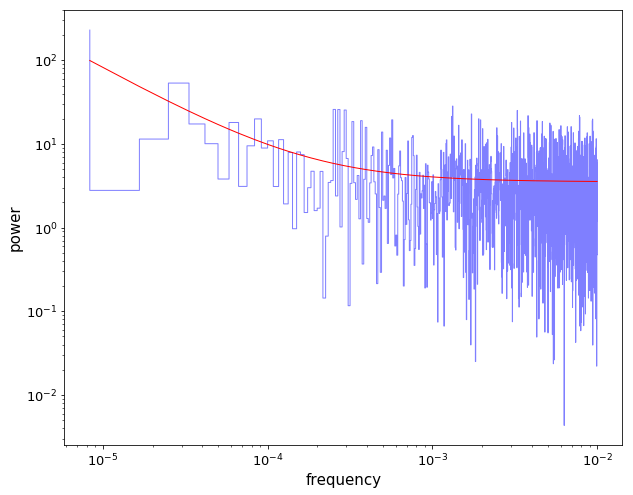

In [7]:
log_A,alpha,log_poisson = n072.values[0],n072.values[1],n072.values[2]

model_nob_072 = []
f_length_072 = len(f_072)
for i in range(f_length_072):
    model_nob_072.append((f_072[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_072, per_072, color="b", alpha=0.5, linewidth=1)
plt.plot(f_072, model_nob_072, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

-0.2308268116948966


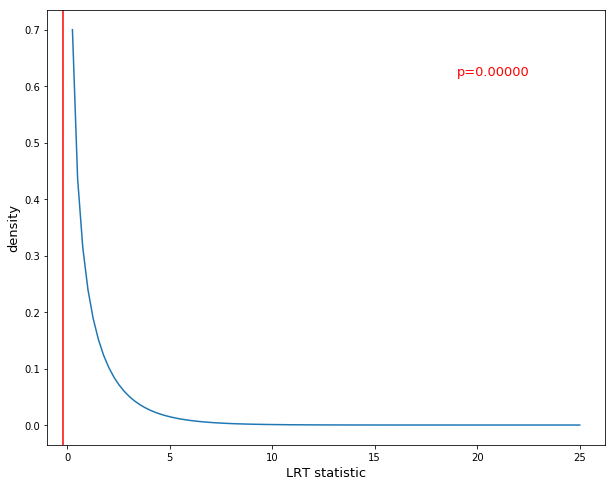

In [8]:
import scipy.stats as stats

# LRT statistic
T = n072.fval-m072.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2012(1) 模型检验

In [9]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_121(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata121 = pd.read_csv("perlist121_s.csv")
    f = perdata121['f']
    per = perdata121['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata121)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [27]:
m121=Minuit(twi_minus_loglikelihood_121,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=3.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-5,0), limit_log_f_b=(-7,-2),limit_alpha_H=(1.0,10.0),limit_log_poisson=(-3,3),
         errordef=1)
'''
奇怪的PSD形状（末端下降）情况下
得到的参数（尤其是alpha_H）的结果很不理想

'''

m121.migrad()

pprint(m121.fval)

FCN = 5653.318560891793 
 TOTAL NCALL = 168 
 NCALLS = 168 
 
 
 EDM = 4.382705981391678e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 False 
 True 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-3.15125,3.09862,,,-5,0,No
1,log_f_b,-6.52909,4.53793,,,-7,-2,No
2,alpha_H,4.61283,4.80796,,,1,10,No
3,log_poisson,0.794506,0.00411802,,,-3,3,No


5653.318560891793


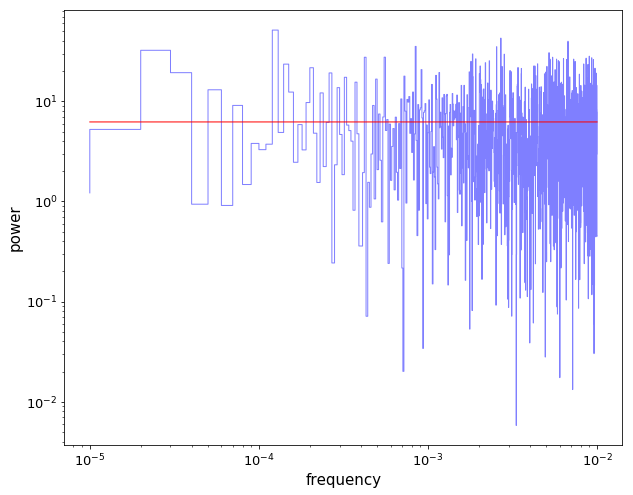

In [28]:
perdata121 = pd.read_csv("perlist121_s.csv")
f_121 = perdata121['f']
per_121 = perdata121['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m121.values[0],m121.values[1],m121.values[2],m121.values[3]

model_121 = []
f_length_121 = len(f_121)
for i in range(f_length_121):
    model_121.append(((f_121[i]**(-alpha_L))/(1+(f_121[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_121, per_121, color="b", alpha=0.5, linewidth=1)
plt.plot(f_121, model_121, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2012(1) 模型比较

In [12]:
def twi_minus_loglikelihood_nobreak_121(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata121 = pd.read_csv("perlist121_s.csv")
    f = perdata121['f']
    per = perdata121['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata121)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [13]:
n121=Minuit(twi_minus_loglikelihood_nobreak_121,log_A=-2,alpha=2.0,log_poisson=3.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-3,3),limit_alpha=(0.0,5.0),limit_log_poisson=(-5,5),
         errordef=1)
'''
奇怪的PSD形状（末端下降）情况下
得到的参数（尤其是alpha_H）的结果很不理想

'''

n121.migrad()

pprint(n121.fval)

FCN = 5647.0917477089815 
 TOTAL NCALL = 239 
 NCALLS = 239 
 
 
 EDM = 3.6163479233112625e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 False 
 True 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.41205,1.62615,,,-3,3,No
1,alpha,0.478811,0.427396,,,0,5,No
2,log_poisson,0.745926,0.0691247,,,-5,5,No


5647.0917477089815


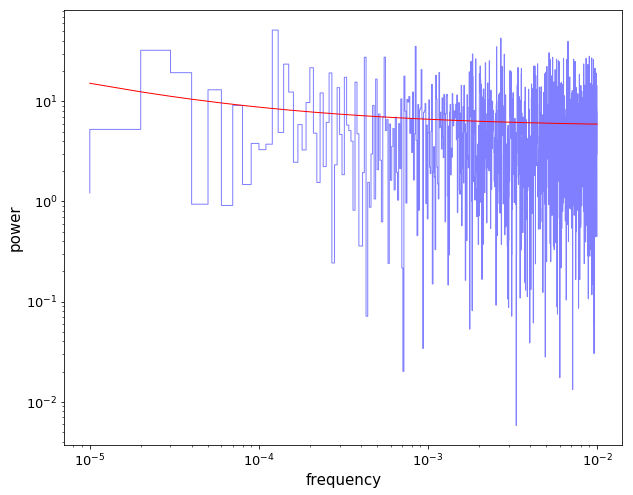

In [14]:
log_A,alpha,log_poisson = n121.values[0],n121.values[1],n121.values[2]

model_nob_121 = []
f_length_121 = len(f_121)
for i in range(f_length_121):
    model_nob_121.append((f_121[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_121, per_121, color="b", alpha=0.5, linewidth=1)
plt.plot(f_121, model_nob_121, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

-3678.5276768126887


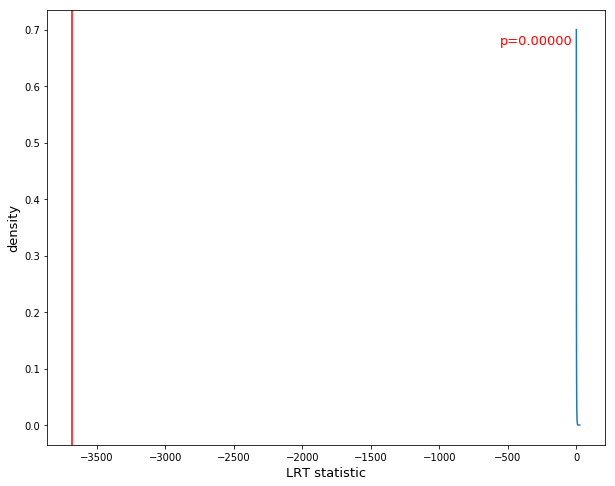

In [15]:
import scipy.stats as stats

# LRT statistic
T = n121.fval-m121.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2013(2) 模型检验

In [16]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_132(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata132 = pd.read_csv("perlist132_s.csv")
    f = perdata132['f']
    per = perdata132['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata132)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [17]:
m132=Minuit(twi_minus_loglikelihood_132,log_A=math.log(0.005,10),log_f_b=-6,alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_alpha_H=(1.0,5.0),limit_log_poisson=(-2,3),
         errordef=1)
'''
不加限制时alpha_H收敛至小于0的值（纯粹拟合到数据，没有物理意义）
结合no-break模型结果，alpha_H 可能最佳拟合值在0.8附近
'''
m132.migrad()

pprint(m132.fval)

FCN = 6390.751186341184 
 TOTAL NCALL = 604 
 NCALLS = 604 
 
 
 EDM = 1.903030445237363e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 False 
 True 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-2.43105,0.000915911,,,,,No
1,log_f_b,-10.3715,183772,,,,,No
2,alpha_H,1,0.0149125,,,1,5,No
3,log_poisson,0.726524,0.000185376,,,-2,3,No


6390.751186341184


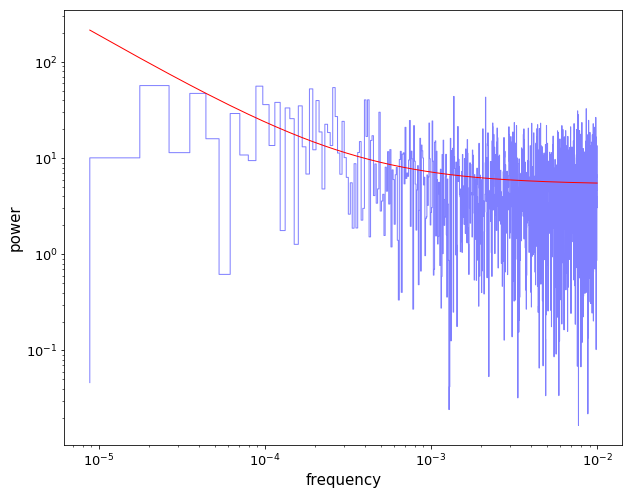

In [18]:
perdata132 = pd.read_csv("perlist132_s.csv")
f_132 = perdata132['f']
per_132 = perdata132['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m132.values[0],m132.values[1],m132.values[2],m132.values[3]

model_132 = []
f_length_132 = len(f_132)
for i in range(f_length_132):
    model_132.append(((f_132[i]**(-alpha_L))/(1+(f_132[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_132, per_132, color="b", alpha=0.5, linewidth=1)
plt.plot(f_132, model_132, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2013(2) 模型比较

In [19]:
def twi_minus_loglikelihood_nobreak_132(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata132 = pd.read_csv("perlist132_s.csv")
    f = perdata132['f']
    per = perdata132['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata132)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [20]:
n132=Minuit(twi_minus_loglikelihood_nobreak_132,log_A=-5,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-7,-2),limit_alpha=(0.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

n132.migrad()

pprint(n132.fval)

FCN = 6389.9836584076775 
 TOTAL NCALL = 214 
 NCALLS = 214 
 
 
 EDM = 2.1044610146229585e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-2.17766,0.730009,,,-7,-2,No
1,alpha,0.846593,0.207374,,,0,5,No
2,log_poisson,0.708119,0.0361244,,,-3,3,No


6389.9836584076775


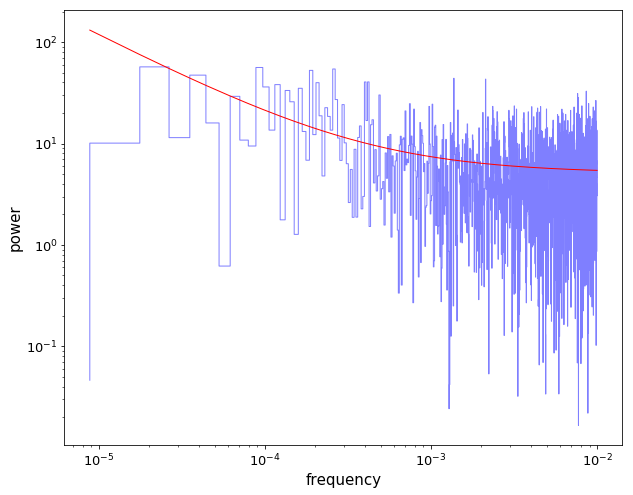

In [21]:
log_A,alpha,log_poisson = n132.values[0],n132.values[1],n132.values[2]

model_nob_132 = []
f_length_132 = len(f_132)
for i in range(f_length_132):
    model_nob_132.append((f_132[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_132, per_132, color="b", alpha=0.5, linewidth=1)
plt.plot(f_132, model_nob_132, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

-0.7675279335062442


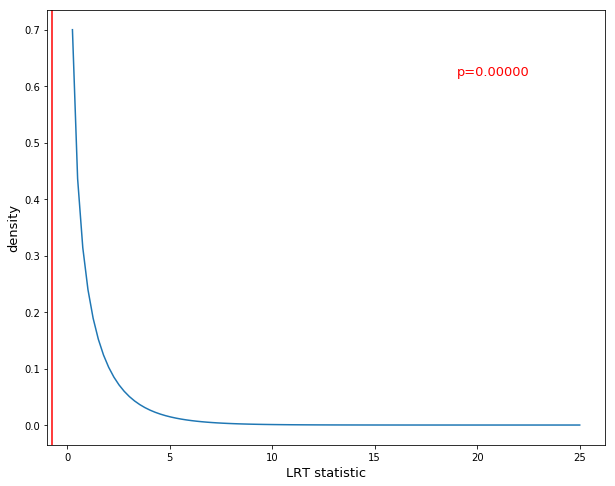

In [22]:
import scipy.stats as stats

# LRT statistic
T = n132.fval-m132.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 综合结果

In [23]:
data072 = pd.read_csv("energy_ngc1365_072.csv")  
x072 = data072['x']
y072 = data072['y']
xerr072 = data072['xerr']
yerr072 = data072['yerr']

data121 = pd.read_csv("energy_ngc1365_121.csv")  
x121 = data121['x']
y121 = data121['y']
xerr121 = data121['xerr']
yerr121 = data121['yerr']

data132 = pd.read_csv("energy_ngc1365_132.csv")  
x132 = data132['x']
y132 = data132['y']
xerr132 = data132['xerr']
yerr132 = data132['yerr']

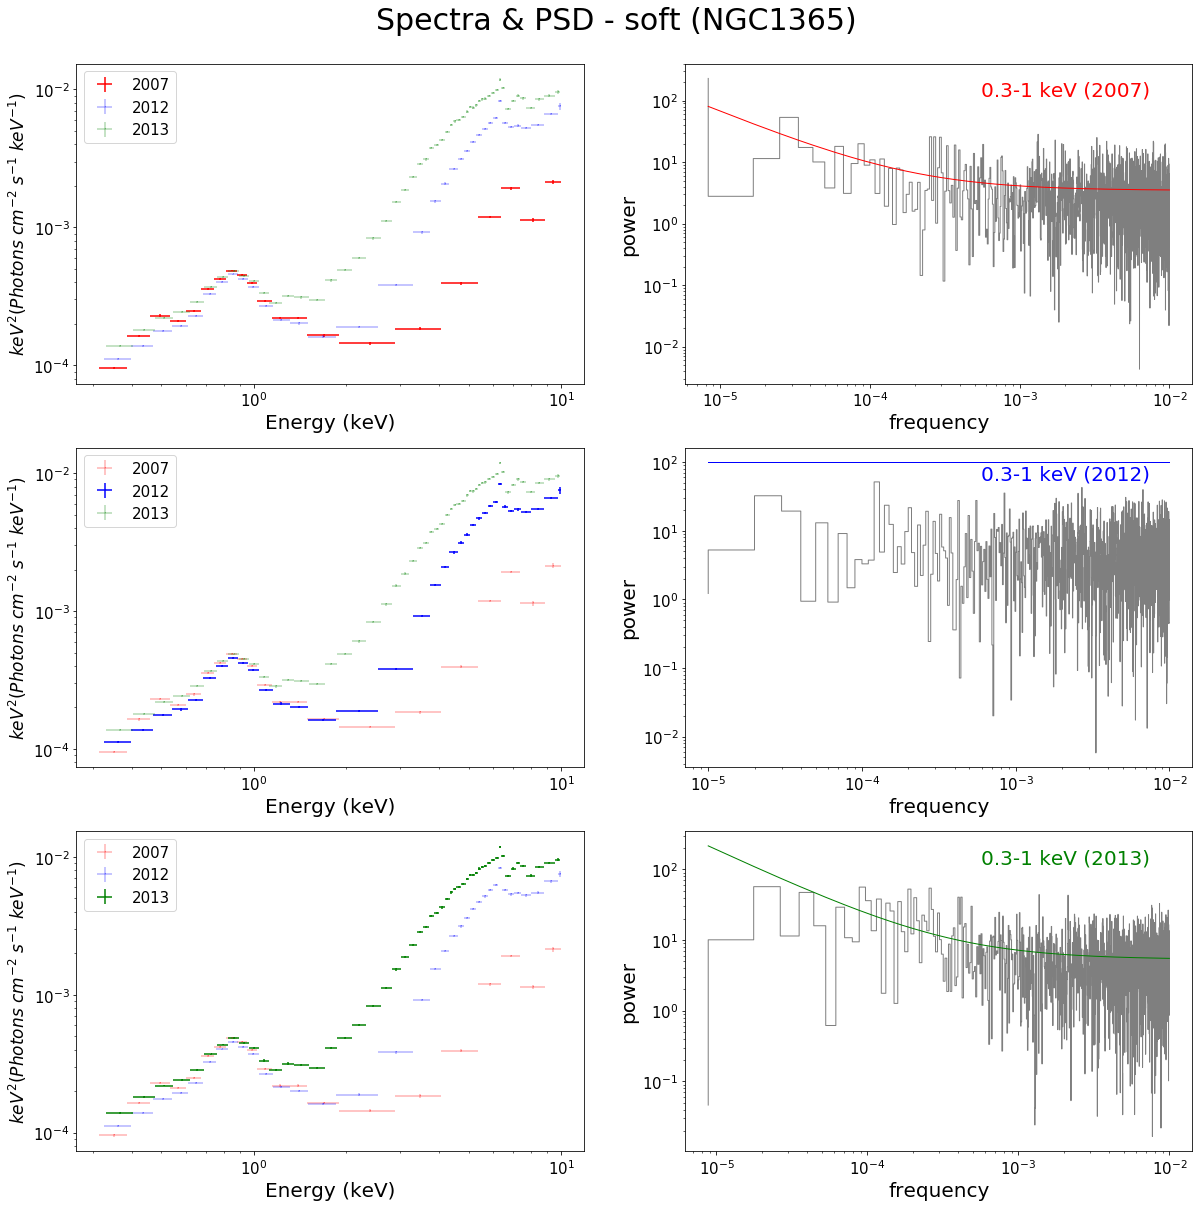

In [24]:
fig= plt.figure(figsize=(20,20))
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)


ax1.loglog()
ax1.errorbar(x072, y072, yerr=yerr072, xerr=xerr072, fmt=',r', label='2007')
ax1.errorbar(x121, y121, yerr=yerr121, xerr=xerr121, fmt=',b', alpha=0.3, label='2012')
ax1.errorbar(x132, y132, yerr=yerr132, xerr=xerr132, fmt=',g', alpha=0.3, label='2013')
ax1.set_xlabel("Energy (keV)",fontsize=20)
ax1.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=15)

ax3.loglog()
ax3.errorbar(x072, y072, yerr=yerr072, xerr=xerr072, fmt=',r', alpha=0.3, label='2007')
ax3.errorbar(x121, y121, yerr=yerr121, xerr=xerr121, fmt=',b', label='2012')
ax3.errorbar(x132, y132, yerr=yerr132, xerr=xerr132, fmt=',g', alpha=0.3, label='2013')
ax3.set_xlabel("Energy (keV)",fontsize=20)
ax3.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax3.legend(fontsize=15)
ax3.tick_params(labelsize=15)

ax5.loglog()
ax5.errorbar(x072, y072, yerr=yerr072, xerr=xerr072, fmt=',r', alpha=0.3, label='2007')
ax5.errorbar(x121, y121, yerr=yerr121, xerr=xerr121, fmt=',b', alpha=0.3, label='2012')
ax5.errorbar(x132, y132, yerr=yerr132, xerr=xerr132, fmt=',g', label='2013')
ax5.set_xlabel("Energy (keV)",fontsize=20)
ax5.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax5.legend(fontsize=15)
ax5.tick_params(labelsize=15)


ax2.loglog()
ax2.step(f_072, per_072, color="k", alpha=0.5, linewidth=1)
ax2.plot(f_072, model_072, color="r", linewidth=1)
ax2.set_xlabel("frequency",fontsize=20)
ax2.set_ylabel("power",fontsize=20)
ax2.text(0.75,0.9,"0.3-1 keV (2007)",color='r',ha='center',transform=ax2.transAxes,fontsize=20)
ax2.tick_params(labelsize=15)

ax4.loglog()
ax4.step(f_121, per_121, color="k", alpha=0.5, linewidth=1)
ax4.plot(f_121, model_121, color="b", linewidth=1)
ax4.set_xlabel("frequency",fontsize=20)
ax4.set_ylabel("power",fontsize=20)
ax4.text(0.75,-0.3,"0.3-1 keV (2012)",color='b',ha='center',transform=ax2.transAxes,fontsize=20)
ax4.tick_params(labelsize=15)

ax6.loglog()
ax6.step(f_132, per_132, color="k", alpha=0.5, linewidth=1)
ax6.plot(f_132, model_132, color="g", linewidth=1)
ax6.set_xlabel("frequency",fontsize=20)
ax6.set_ylabel("power",fontsize=20)
ax6.text(0.75,-1.5,"0.3-1 keV (2013)",color='g',ha='center',transform=ax2.transAxes,fontsize=20)
ax6.tick_params(labelsize=15)


plt.suptitle("Spectra & PSD - soft (NGC1365)", x=0.5, y=0.92, fontsize=30)
plt.show()